# Python Objects & References

Everything in Python is an `object`.  An object is a piece of memory with values & associated operations.

We've seen plenty of methods on `str`, `list`, `dict`, etc. 

`a_string.lower()`, `dict.pop(val)`, etc.

As we'll see in time, every type in Python works this way. 

Operators like `+`, `-`, `and` and `or` are "associated operations" when we're using scalars like `int` or `bool`.

Variables in python are referred to as *names* or *identifiers*.

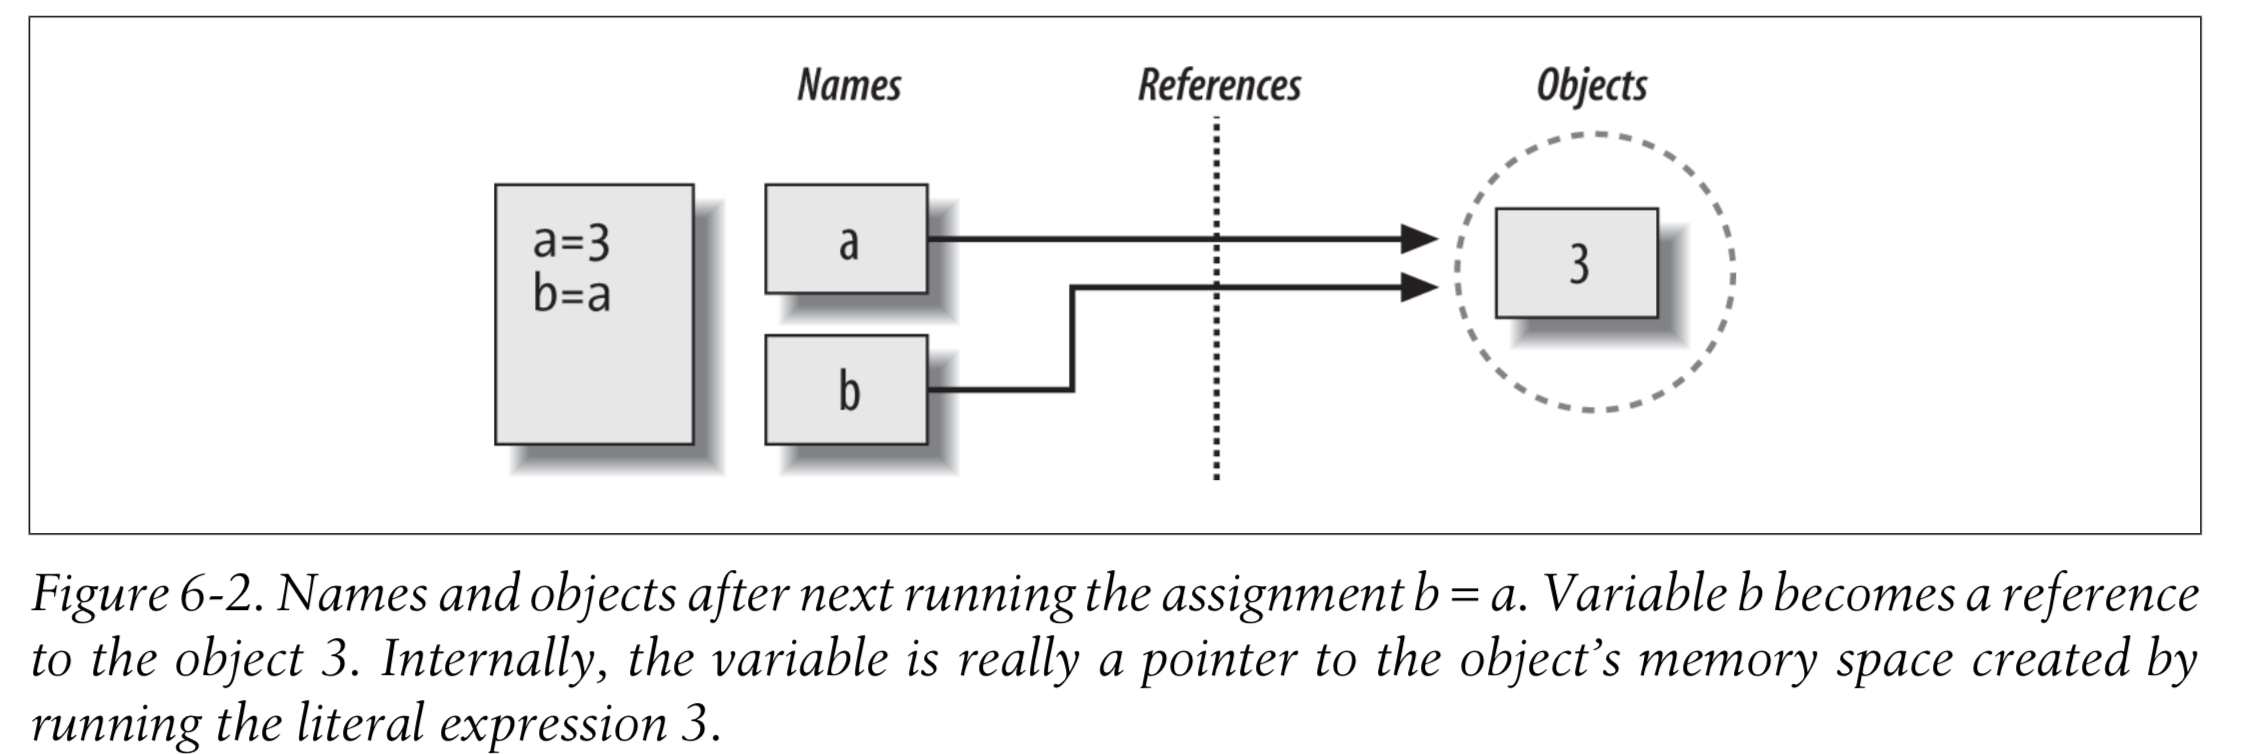

 -- Learning Python 2013
 
A name does not uniquely identify an object!

## objects are typed, not variables

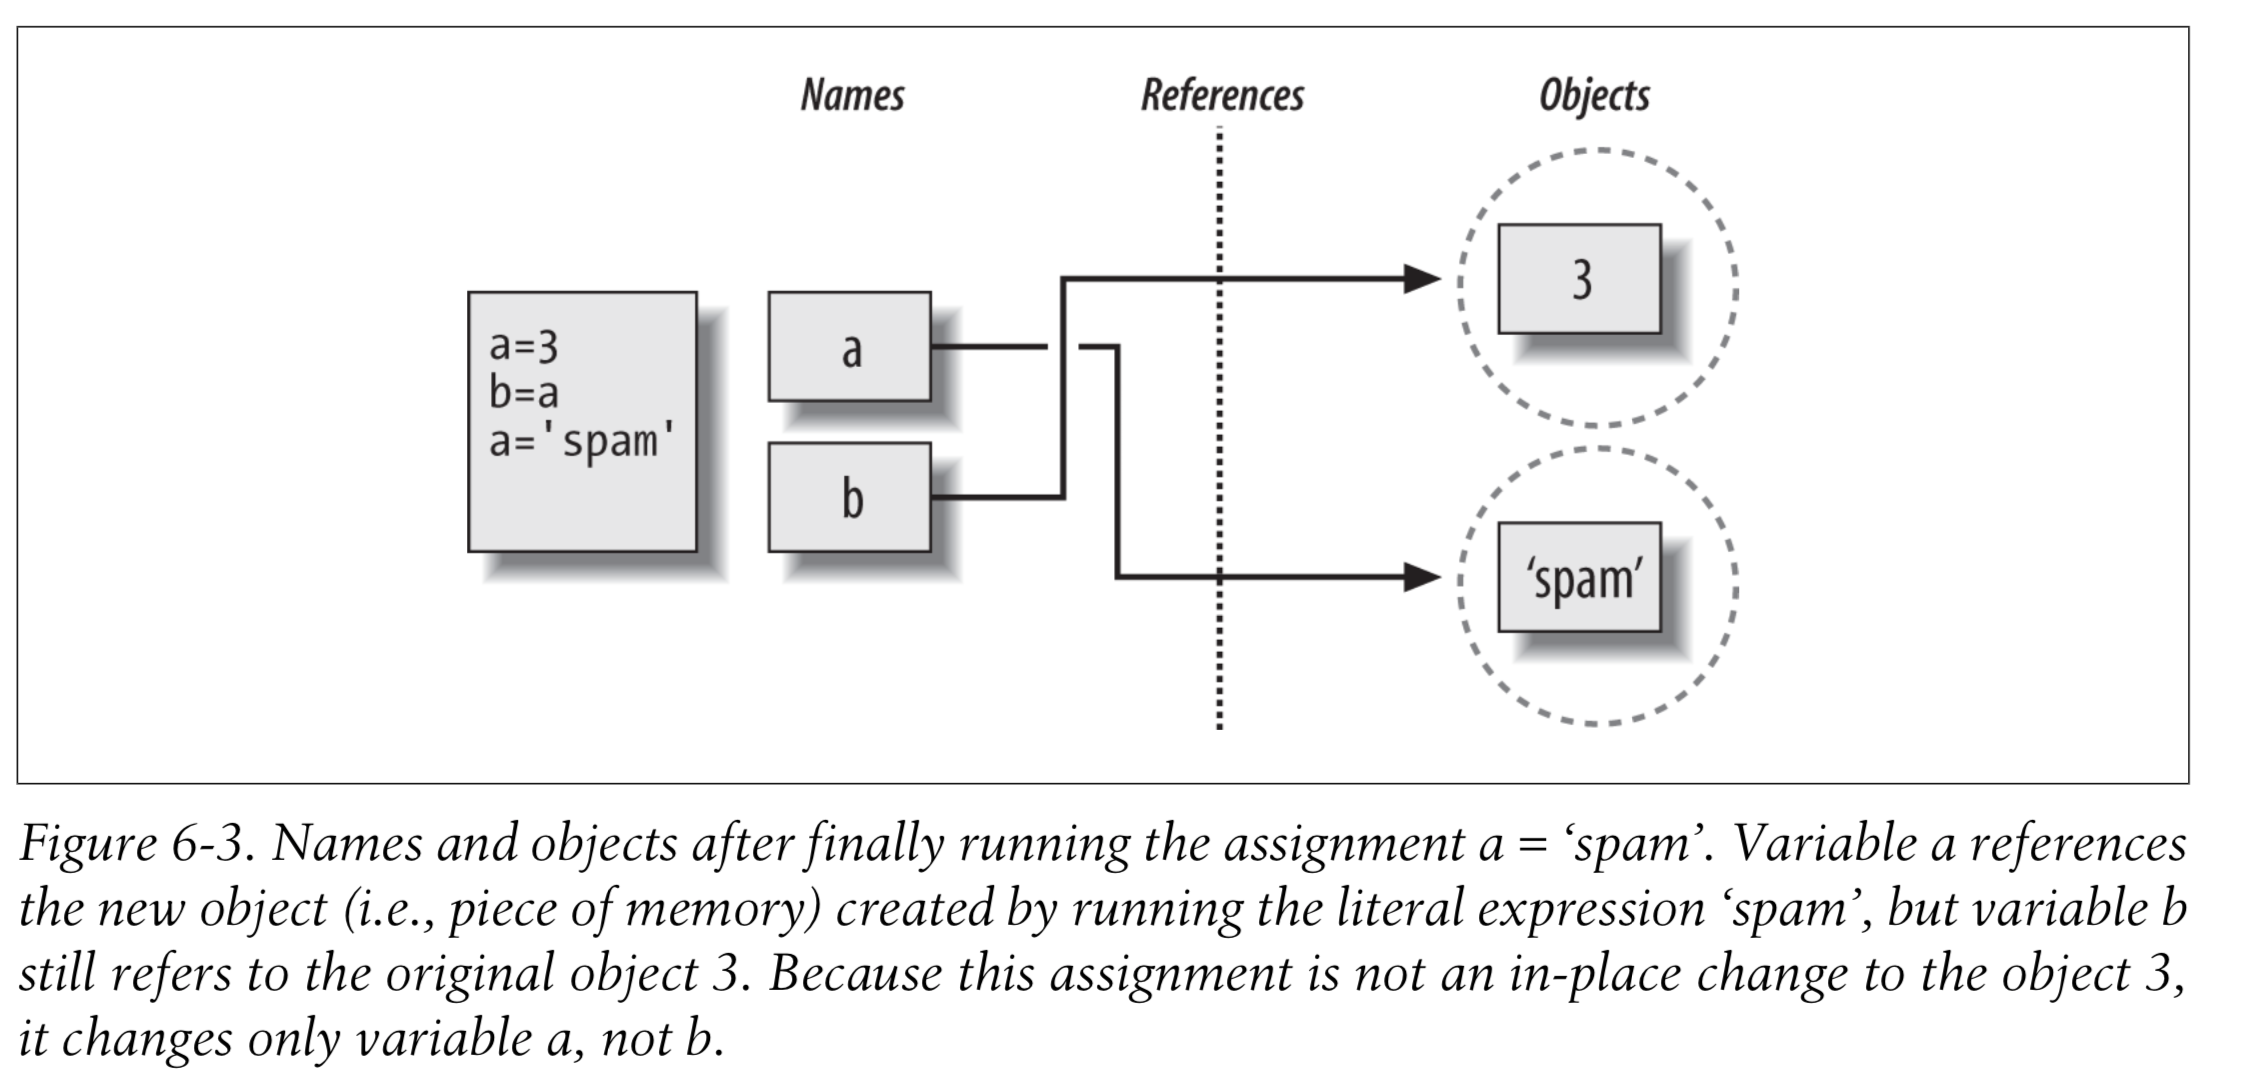
 -- Learning Python 2013

## Shared references

Setting a variable to a new value does not alter the original.

It causes the variable to reference a brand new object.

In [ ]:
x = 10
y = x
x = 20
print(x, y)

In [ ]:
# what does this mean for mutable objects?
x = [1, 2, 3]
y = x
y.append(4)
print(x)
print(y)

In [ ]:
a = 3
b = a
a *= 2
print(a, b)

In [ ]:
a = 3113
id(a)

In [ ]:
b = 39209328
id(b)

In [ ]:
id(1)

In [ ]:
id(1)

In [ ]:
c = b
id(c)

In [ ]:
id("hello")

In [ ]:
id("hello")

In [ ]:
x = []

In [ ]:
y = []

In [ ]:
id(x)

In [ ]:
id(y)

## Garbage Collection

Python is a garbage collected language.  

We don't free our own memory, Python does instead.

Behind the scenes, Python stores a reference counter on each `object`.  How many names/objects reference the object.

When reference count drops to zero, Python can reclaim the memory.

## Identity

The built-in `id(...)` function returns the identity of an object, which is an integer value guaranteed to be unique and constant for lifetime of object

In the ofificial ("CPython") Interpeter we are using in this class, it is the address of the memory location storing the object.

In [8]:
x = "MPCS" 
print(id(x))  # Unique integer-value for the object pointed by x

4384777776


In [9]:
y = "MPCS" 
print(id(y)) 

4384777776


In [10]:
fruit1 = ("Apples", 4)
fruit2 = ("Apples", 4)
fruit3 = fruit2
print(f"Fruit1 id = {id(fruit1)} \n Fruit2 id = {id(fruit2)}")
print(f"Fruit3 id= {id(fruit3)}")

Fruit1 id = 4384803008 
 Fruit2 id = 4384782464
Fruit3 id= 4384782464


In [25]:
fruit is fruit2

True

#### Equality vs. Identity

Two different ways of testing if objects are the "same":

- Equality operator (`==`): Returns true if two objects are equal (i.e., have the same value)
- Identity operator (`is`): Returns true if two objects identities are the same.

`a is b` means `id(a) == id(b)`

In [12]:
a = [1, 2, 3]
b = [1, 2, 3]
print("a == b", a == b)

print(id(a))
print(id(b))
print("a is b", a is b)  # The id values are different

a == b True
4384871424
4384871168
a is b False


In [13]:
print(id(None))

4366718832


In [15]:
def f():
    pass
id(f())

4366718832

#### `is None`

If you ever need to check if a value is `None`, you'd use `is None` or `is not None`

### list / string mutability revisited

In [16]:
# list d
d = [1, 2, 3]
print(id(d))
d.append(4)
print(d)
print(id(d))

4384869248
[1, 2, 3, 4]
4384869248


In [17]:
# str D
s = "Hello"
print(id(s))
s += " World"
print(s)

# did s change?
print(id(s))

4384746736
Hello World
4384771632


### Aside: Object Creation Quirk

    Each time you generate a new value in your script by running an expression, Python creates a new object (i.e., a chunk of memory) to represent that value.
    
-- Learning Python 2013

Not quite! CPython does not guarantee this, and in fact sometimes caches & reuses immutable objects for efficiency.



In [20]:
a = 100
b = 100

# Two different objects, two different ids.
print(a is b)

True


In [21]:
# a = 100
# b = 100

# However, for small integer objects, CPython caches them
# this means that a and b point to the same object
# print(a is b)

for i in range(500, 600):
    print(i, i is i)

500 True
501 True
502 True
503 True
504 True
505 True
506 True
507 True
508 True
509 True
510 True
511 True
512 True
513 True
514 True
515 True
516 True
517 True
518 True
519 True
520 True
521 True
522 True
523 True
524 True
525 True
526 True
527 True
528 True
529 True
530 True
531 True
532 True
533 True
534 True
535 True
536 True
537 True
538 True
539 True
540 True
541 True
542 True
543 True
544 True
545 True
546 True
547 True
548 True
549 True
550 True
551 True
552 True
553 True
554 True
555 True
556 True
557 True
558 True
559 True
560 True
561 True
562 True
563 True
564 True
565 True
566 True
567 True
568 True
569 True
570 True
571 True
572 True
573 True
574 True
575 True
576 True
577 True
578 True
579 True
580 True
581 True
582 True
583 True
584 True
585 True
586 True
587 True
588 True
589 True
590 True
591 True
592 True
593 True
594 True
595 True
596 True
597 True
598 True
599 True


In [ ]:
# CPython does the same for short strings
str1 = "MPCS" * 100
str2 = "MPCS" * 100
print(id(str1), id(str2))
str1 is str2

## copy & deepcopy

If `y = x` does not make a copy, how can we get one?

We've seen the `.copy()` method on a few of our types.  Which ones?

We can also use the `copy` module:

In [26]:
x = [1, 2, 3]
y = x.copy()

print(id(x))
print(id(y))

x.append(4)
print(x, y)

4384496640
4384370048
[1, 2, 3, 4] [1, 2, 3]


In [27]:
# shallow copy example (nested mutables are not copied)

x = [[1, 2], [3, 4]]
y = x.copy()  # or copy.copy(x)

print("x is y", x is y)
print("x[0] is y[0]", x[0] is y[0])
print("x[1] is y[1]", x[1] is y[1])

# print(x, y)
x[0].append(5)
print(x, "\n", y)

x is y False
x[0] is y[0] True
x[1] is y[1] True
[[1, 2, 5], [3, 4]] 
 [[1, 2, 5], [3, 4]]


In [3]:
# deep copy (nested mutables are copied)
import copy

# copy.copy(obj) --> same as obj.copy()
z = copy.deepcopy(x)
print("x[0] is z[0]", x[0] is z[0])

x[0] is z[0] False
